In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
import joblib


In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")


In [3]:
print(df)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [4]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


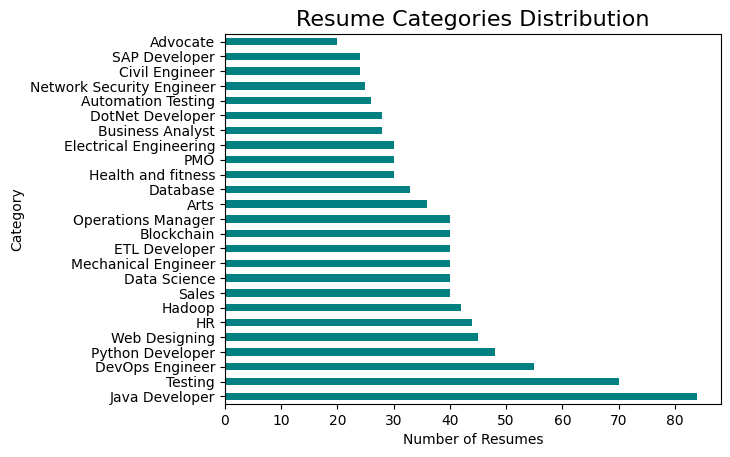


Top Categories:
 Category
Java Developer      84
Testing             70
DevOps Engineer     55
Python Developer    48
Web Designing       45
Name: count, dtype: int64


In [5]:

category_counts = df['Category'].value_counts()
category_counts.plot(kind='barh', color='teal')
plt.title('Resume Categories Distribution', fontsize=16)
plt.xlabel('Number of Resumes')
plt.ylabel('Category')
plt.show()

print("\nTop Categories:\n", category_counts.head())


In [6]:
def clean_resume(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'RT|cc', '', text)   
    text = re.sub(r'#\S+', '', text)     
    text = re.sub(r'@\S+', '', text)     
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    text = text.lower()                
    text = text.strip()                  
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [7]:
df['cleaned_resume'] = df['Resume'].apply(clean_resume)

In [8]:
print(df['cleaned_resume'].head())


0    skills programming languages python pandas num...
1    education details may may uitrgpv data scienti...
2    areas interest deep learning control system de...
3    skills r python sap hana tableau sap hana sql ...
4    education details mca ymcaust faridabad haryan...
Name: cleaned_resume, dtype: object


In [9]:
tfidf = TfidfVectorizer(
    max_features=500,      
    ngram_range=(1, 1),
    min_df=3,            
    max_df=0.7             
)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()
y = df['Category']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.5)
model.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Accuracy: 0.9689119170984456

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00         4
                     Arts       0.88      1.00      0.93         7
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       0.89      1.00      0.94         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
      

In [ ]:
joblib.dump(model, 'resume_classifier.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')